## **Bishal Rauniyar**

## **Task 1:Predicting percentage of student marks based on no. of study hours using Supervised ML**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Importing data 
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##  **Exploring Data Analysis**

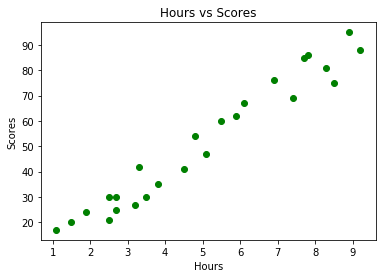

In [36]:
plt.scatter(df['Hours'],df['Scores'],color="green",alpha=1)
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

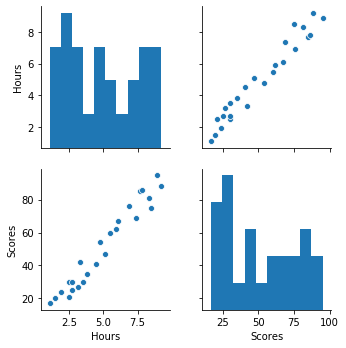

In [5]:
import seaborn as sns
sns.pairplot(df)

## **Preparing Data**

In [6]:
x= df['Hours'].values.reshape(-1,1)
y= df['Scores'].values

## **Training the Data**

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm.intercept_

3.4050301755918966

In [15]:
lm.coef_

array([9.65029083])

## **Plotting Regression line**

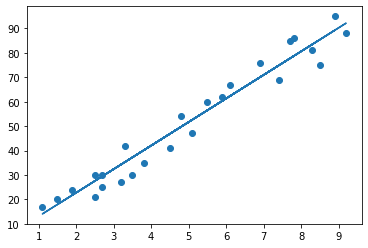

In [20]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

## **Predicting Test Data**

In [23]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]
 [3.8]]


In [24]:
predictions = lm.predict(X_test)

In [25]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df1

,Actual,Predicted
0,81,83.502444
1,30,27.530757
2,21,27.530757
3,76,69.992037
4,62,60.341746
5,25,29.460815
6,42,35.250990
7,47,52.621513
8,35,40.076135


In [28]:
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.67022037739969


## **Evaluating the Model**

In [30]:
from sklearn import metrics

In [33]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 4.564015037730867
MSE: 24.074686364260973
RMSE: 4.9065962096203695
